In [ ]:
# @title 1. Setup and Library Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.decomposition import PCA
from scipy.stats import mode # For mapping clusters to true labels

In [ ]:
# Set style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

In [ ]:
# @title 2. Data Loading and Initial Inspection
# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target, name='target') # 'target' is 0 for malignant, 1 for benign

In [ ]:
# Display basic info
print("Dataset Shape:", X.shape)
print("\nFirst 5 rows of features (X):")
print(X.head())
print("\nTarget variable (y) value counts:")
print(y.value_counts()) # 0: malignant, 1: benign

print("\nData Info:")
X.info()

print("\nDescriptive Statistics:")
print(X.describe())

Dataset Shape: (569, 30)

First 5 rows of features (X):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  wors

In [ ]:
# @title 3. Data Cleaning, Preprocessing, and Wrangling
# Check for missing values
print("Missing values in X:\n", X.isnull().sum().sum())
# Check for duplicate rows
print("\nDuplicate rows in X:", X.duplicated().sum())

Missing values in X:
 0

Duplicate rows in X: 0


In [ ]:
# --- Preprocessing: Feature Scaling ---
# Unsupervised algorithms, especially distance-based ones, are very sensitive to feature scales.
# StandardScaler transforms the data to have a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns) # Convert back to DataFrame for easier inspection

print("\nFirst 5 rows of scaled features (X_scaled_df):")
print(X_scaled_df.head())
print("\nDescriptive statistics of scaled features:")
print(X_scaled_df.describe().loc[['mean', 'std']]) # Verify mean ~0 and std ~1


First 5 rows of scaled features (X_scaled_df):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ...  worst radius

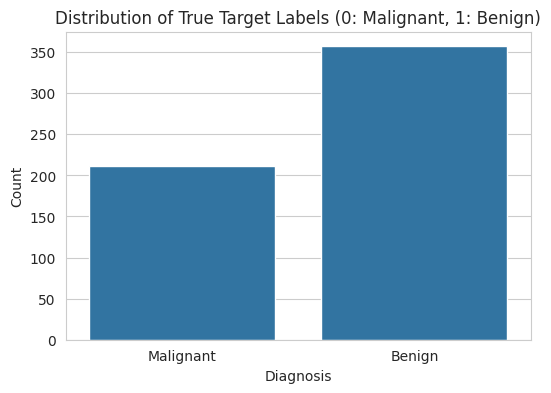

In [ ]:
# @title 4. Exploratory Data Analysis (EDA)
# Distribution of the (hidden) target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of True Target Labels (0: Malignant, 1: Benign)')
plt.xticks(ticks=[0, 1], labels=['Malignant', 'Benign'])
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

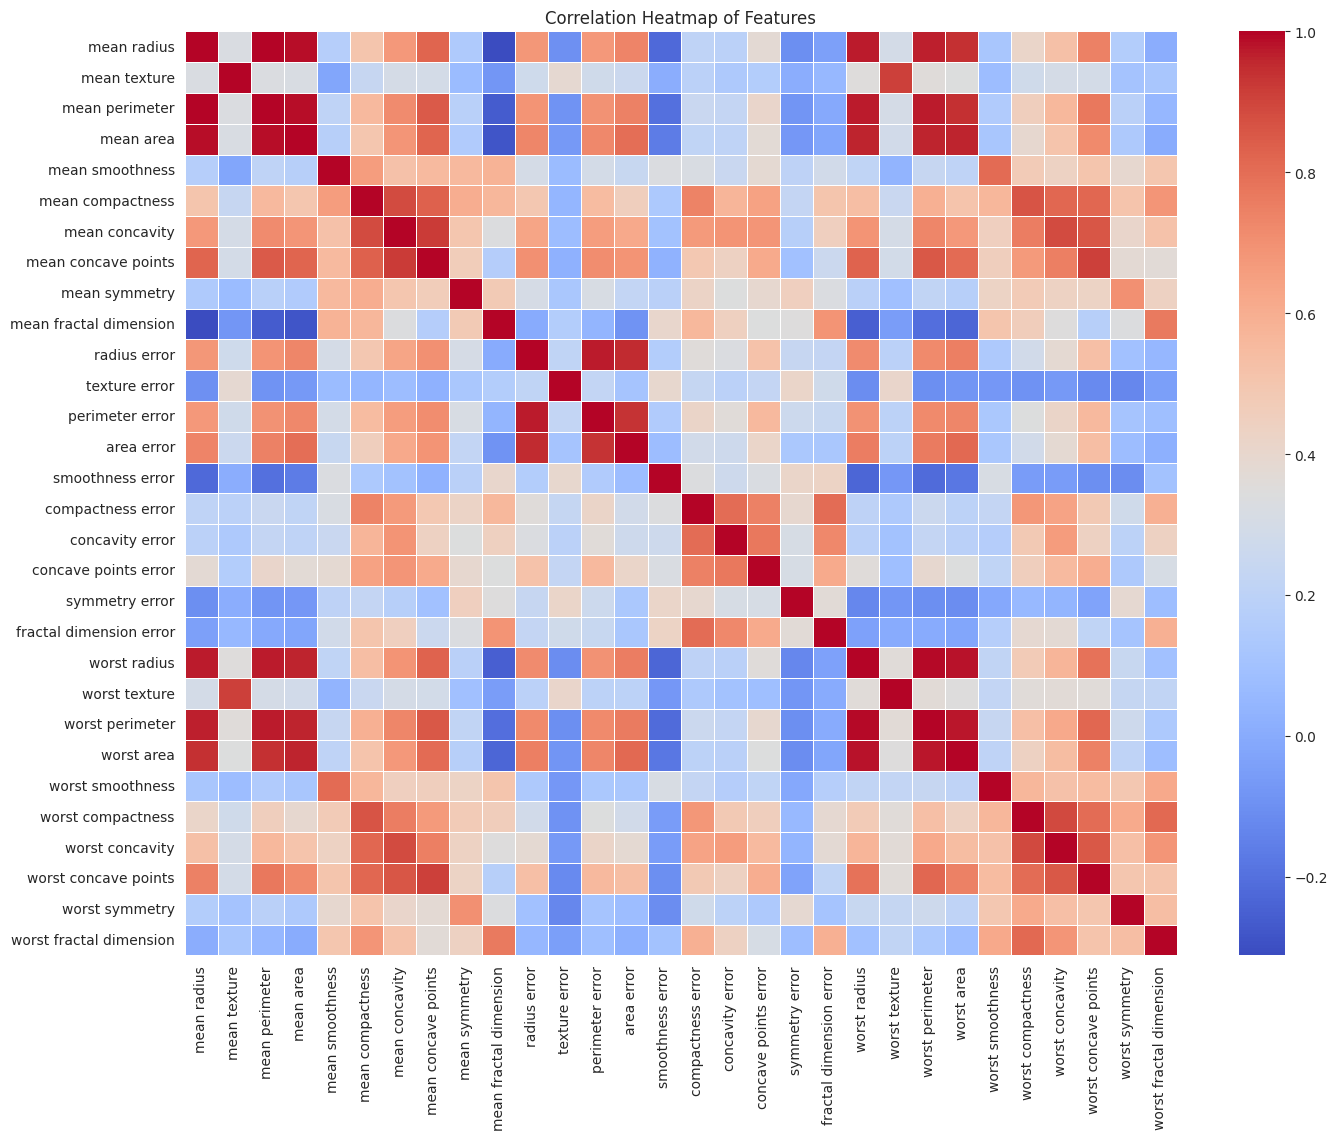

In [ ]:
# Correlation Heatmap
# This shows relationships between features, which can be useful for feature selection
plt.figure(figsize=(16, 12))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()

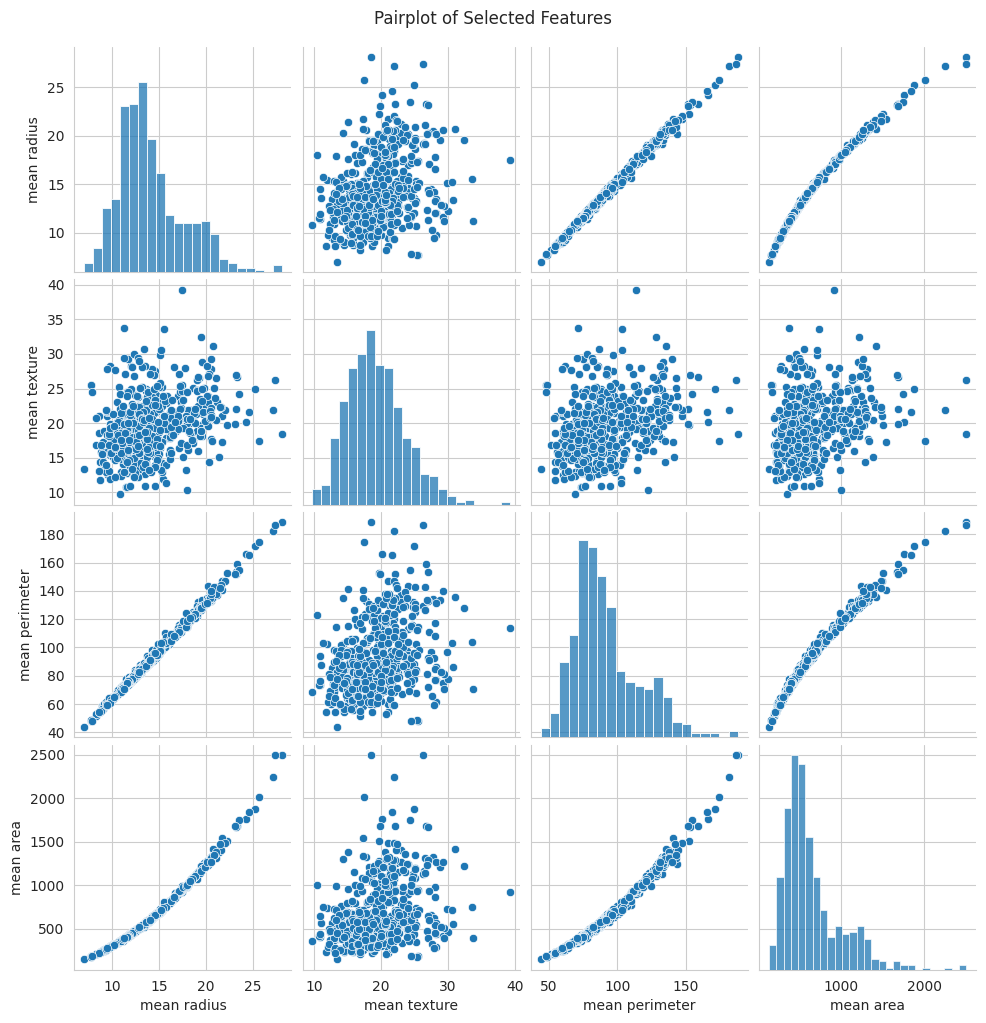

In [ ]:
# Pairplot for a subset of features (too many features for full pairplot)
# This helps visualize relationships and distributions between selected pairs of features.
# We'll use the original (unscaled) X for easier interpretation of ranges.
selected_features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
sns.pairplot(X.loc[:, selected_features])
plt.suptitle('Pairplot of Selected Features', y=1.02) # Adjust title position
plt.show()

In [ ]:
# --- Dimensionality Reduction for Visualization (PCA) ---
# PCA can help visualize high-dimensional data in 2D or 3D.
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=principal_components, columns=['principal component 1', 'principal component 2'])

In [ ]:
# Add the true labels for visualization (remember, algorithms don't see this)
pca_df['target'] = y

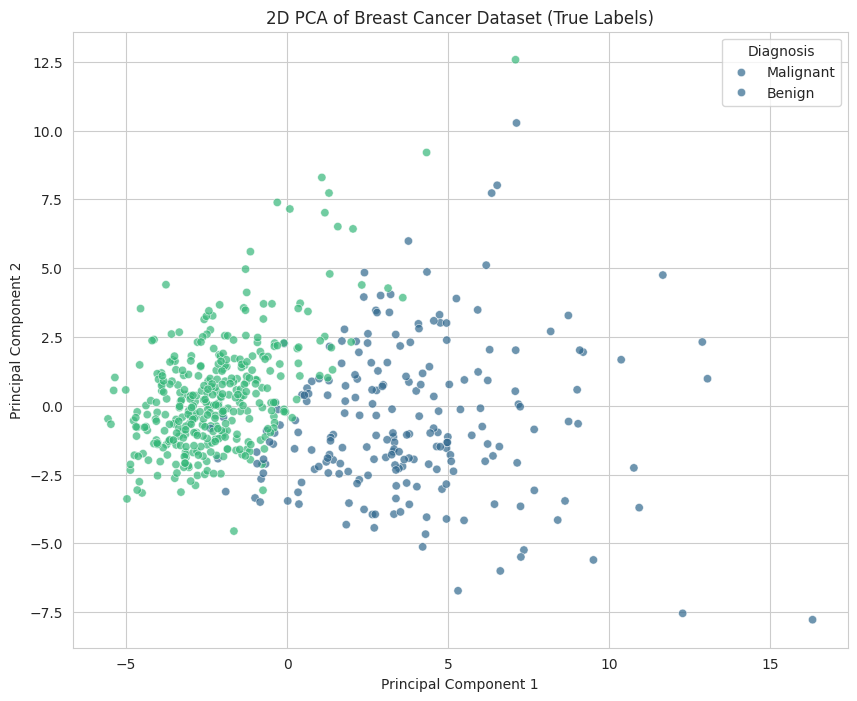

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='principal component 1', y='principal component 2', hue='target',
data=pca_df, palette='viridis', alpha=0.7)
plt.title('2D PCA of Breast Cancer Dataset (True Labels)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Diagnosis', labels=['Malignant', 'Benign'])
plt.show()

In [ ]:
print("\nExplained variance ratio by principal components:", pca.explained_variance_ratio_)
print("Total explained variance by 2 components:", sum(pca.explained_variance_ratio_))


Explained variance ratio by principal components: [0.44272026 0.18971182]
Total explained variance by 2 components: 0.6324320765155944


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd


# 3. PCA (dimensionality reduction)
X_pca = PCA(n_components=2).fit_transform(X_scaled)

# 4. Make DataFrame
df = pd.DataFrame(X_pca, columns=['PC1','PC2'])
df['target'] = y
print(df.head())

        PC1        PC2  target
0  9.192837   1.948583       0
1  2.387802  -3.768172       0
2  5.733896  -1.075174       0
3  7.122953  10.275589       0
4  3.935302  -1.948072       0


In [ ]:
# @title 6. Algorithm 1: K-Means Clustering
print("--- K-Means Clustering ---")
# Determine optimal 'k' (number of clusters)
# Since we know there are 2 classes (malignant/benign), we'll aim for k=2.
# However, for a general unsupervised problem, one might use methods like:
# 1. Elbow Method (Inertia): Sum of squared distances of samples to their closest cluster center.
wcss = [] # Within-cluster sum of squares
for i in range(1, 11):
 kmeans_test = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10,
random_state=42)
 kmeans_test.fit(X_scaled)
 wcss.append(kmeans_test.inertia_)

--- K-Means Clustering ---


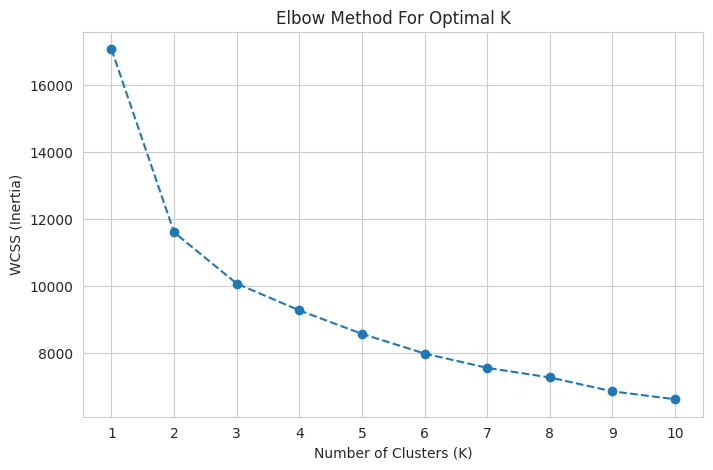

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(np.arange(1, 11, 1))
plt.show()

In [ ]:
# 2. Silhouette Score: Measures how similar an object is to its own cluster (cohesion)
# compared to other clusters (separation). Ranges from -1 (bad) to +1 (good).
silhouette_scores = []
for i in range(2, 11): # Silhouette score requires at least 2 clusters
 kmeans_test = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10,
random_state=42)
 kmeans_test.fit(X_scaled)
 score = silhouette_score(X_scaled, kmeans_test.labels_)
 silhouette_scores.append(score)
 print(f"K={i}, Silhouette Score: {score:.4f}")

K=2, Silhouette Score: 0.3434
K=3, Silhouette Score: 0.3144
K=4, Silhouette Score: 0.2833
K=5, Silhouette Score: 0.1582
K=6, Silhouette Score: 0.1604
K=7, Silhouette Score: 0.1532
K=8, Silhouette Score: 0.1472
K=9, Silhouette Score: 0.1470
K=10, Silhouette Score: 0.1367


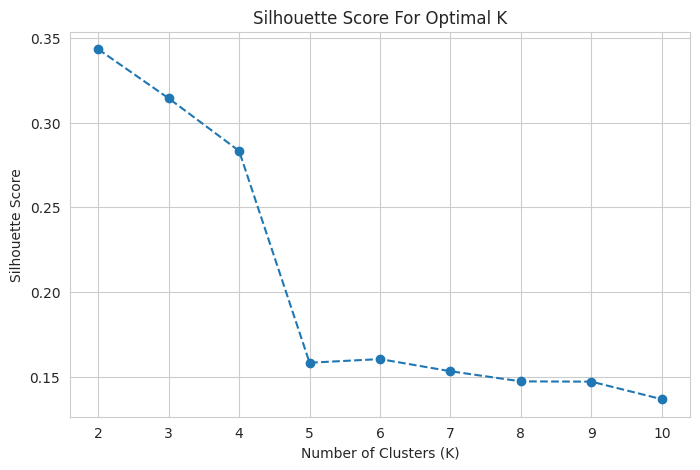

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(2, 11, 1))
plt.show()

In [ ]:
# From Elbow and Silhouette, K=2 seems like a reasonable choice, aligning with our problem knowledge.
# Let's train K-Means with k=2
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [ ]:
# --- Evaluation and Metrics for K-Means ---
# Map cluster labels to true labels for comparison
# Let's find which cluster (0 or 1) corresponds to which true label (0 or 1)
labels = np.zeros_like(kmeans_labels)
for i in range(2): # For each cluster
 mask = (kmeans_labels == i)
 # Find the most frequent true label in this cluster
 if len(y[mask]) > 0: # Ensure there are points in the cluster
  majority_true_label = mode(y[mask])[0]
  labels[mask] = majority_true_label # Map the cluster to its majority true label

In [ ]:
# Define true labels and predicted labels for confusion matrix visualization
true_labels_cat = ['Malignant' if l == 0 else 'Benign' for l in y]
predicted_labels_cat = ['Malignant' if l == 0 else 'Benign' for l in labels]


K-Means Confusion Matrix:
[[176  36]
 [ 18 339]]


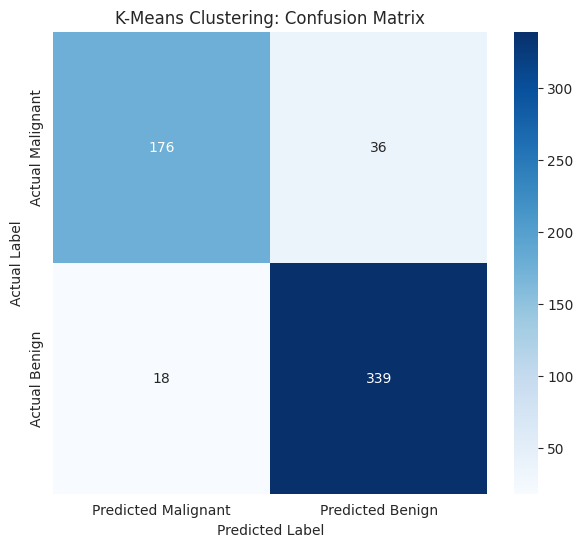

In [ ]:
# Confusion Matrix
cm_kmeans = confusion_matrix(y, labels)
print("\nK-Means Confusion Matrix:")
print(cm_kmeans)
plt.figure(figsize=(7, 6))
sns.heatmap(cm_kmeans, annot=True, fmt='d', cmap='Blues',
 xticklabels=['Predicted Malignant', 'Predicted Benign'],
 yticklabels=['Actual Malignant', 'Actual Benign'])
plt.title('K-Means Clustering: Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Accuracy Score
accuracy_kmeans = accuracy_score(y, labels)
print(f"\nK-Means Accuracy Score: {accuracy_kmeans:.4f}")


K-Means Accuracy Score: 0.9051


In [ ]:
# ROC Curve and AUC (for binary classification context)
# We treat one class (e.g., Benign=1) as the positive class.
# Since cluster assignments are hard (0 or 1), the ROC curve will be sharp.
fpr_kmeans, tpr_kmeans, thresholds_kmeans = roc_curve(y, labels)
roc_auc_kmeans = roc_auc_score(y, labels)

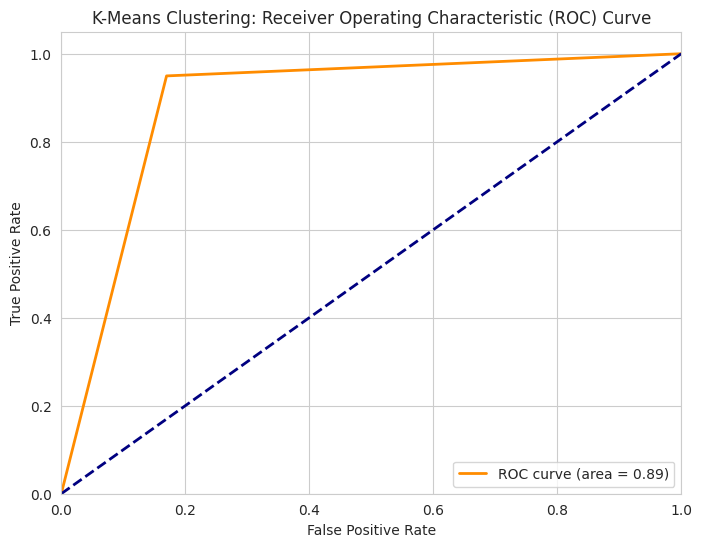

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_kmeans, tpr_kmeans, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_kmeans:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Means Clustering: Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# --- Non-Applicable Metrics for Clustering ---
print("\n--- Metrics Not Applicable for Clustering (Regression Metrics) ---")
print("MAE (Mean Absolute Error): Not applicable for clustering (used for regression).")
print("MSE (Mean Squared Error): Not applicable for clustering (used for regression).")
print("RMSE (Root Mean Squared Error): Not applicable for clustering (used for regression).")
print("R-squared: Not applicable for clustering (used for regression).")


--- Metrics Not Applicable for Clustering (Regression Metrics) ---
MAE (Mean Absolute Error): Not applicable for clustering (used for regression).
MSE (Mean Squared Error): Not applicable for clustering (used for regression).
RMSE (Root Mean Squared Error): Not applicable for clustering (used for regression).
R-squared: Not applicable for clustering (used for regression).


In [ ]:
# --- K-Means Prediction and Decision Making ---
print("\n--- K-Means Prediction and Decision Making ---")
print("K-Means identified 2 distinct clusters in the dataset.")
print(f"Cluster 0 (mapped to Malignant) contains {np.sum(labels == 0)} samples.")
print(f"Cluster 1 (mapped to Benign) contains {np.sum(labels == 1)} samples.")


--- K-Means Prediction and Decision Making ---
K-Means identified 2 distinct clusters in the dataset.
Cluster 0 (mapped to Malignant) contains 194 samples.
Cluster 1 (mapped to Benign) contains 375 samples.


In [ ]:
print(f"\nIf we consider these clusters as our predictions, the model achieved an accuracy of {accuracy_kmeans:.2%} in classifying malignant vs. benign cases.")
print("This indicates that K-Means effectively groups the data points in a way that largelyaligns with the true disease diagnosis.")
print("Decision-makers can use these cluster assignments to identify potentially similar groupsof patients based on their features, even without prior labels.")
print("For instance, a new patient's features could be scaled and then assigned to one of these clusters to suggest a likely diagnosis or group for further study.")


If we consider these clusters as our predictions, the model achieved an accuracy of 90.51% in classifying malignant vs. benign cases.
This indicates that K-Means effectively groups the data points in a way that largelyaligns with the true disease diagnosis.
Decision-makers can use these cluster assignments to identify potentially similar groupsof patients based on their features, even without prior labels.
For instance, a new patient's features could be scaled and then assigned to one of these clusters to suggest a likely diagnosis or group for further study.


In [ ]:
# Create a dummy new data point (e.g., average of first 5 malignant cases)
new_patient_features = X[y == 0].head(1).values # Get features of a known malignant case
new_patient_features_scaled = scaler.transform(new_patient_features)
predicted_cluster_kmeans = kmeans.predict(new_patient_features_scaled)
print(f"\nExample: A new patient with certain features would be assigned to K-Means Cluster: {predicted_cluster_kmeans[0]}")
print(f"Based on our mapping, this corresponds to a likely diagnosis of: {'Malignant' if labels[np.where(kmeans_labels == predicted_cluster_kmeans[0])[0][0]] == 0 else 'Benign'}")


Example: A new patient with certain features would be assigned to K-Means Cluster: 1
Based on our mapping, this corresponds to a likely diagnosis of: Malignant


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# @title 7. Algorithm 2: Agglomerative Clustering
print("\n--- Agglomerative Clustering ---")


--- Agglomerative Clustering ---


In [ ]:
# Choose k=2 as we did for K-Means, based on problem knowledge.
# 'linkage' parameter determines how the distance between clusters is measured. 'ward' minimizes variance.
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
agg_labels = agg_clustering.fit_predict(X_scaled)

In [ ]:
# --- Evaluation and Metrics for Agglomerative Clustering ---
# Map cluster labels to true labels for comparison
labels_agg = np.zeros_like(agg_labels)
for i in range(2):
 mask = (agg_labels == i)
 if len(y[mask]) > 0:
    majority_true_label = mode(y[mask])[0]
    labels_agg[mask] = majority_true_label


Agglomerative Clustering Confusion Matrix:
[[164  48]
 [ 20 337]]


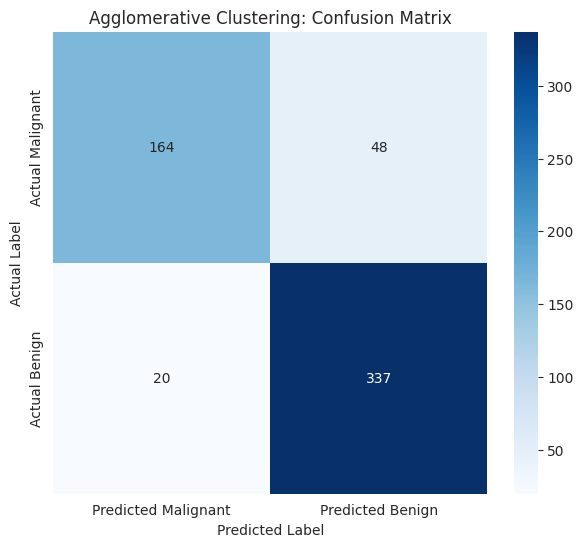

In [ ]:
# Confusion Matrix
cm_agg = confusion_matrix(y, labels_agg)
print("\nAgglomerative Clustering Confusion Matrix:")
print(cm_agg)
plt.figure(figsize=(7, 6))
sns.heatmap(cm_agg, annot=True, fmt='d', cmap='Blues',
 xticklabels=['Predicted Malignant', 'Predicted Benign'],
 yticklabels=['Actual Malignant', 'Actual Benign'])
plt.title('Agglomerative Clustering: Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Accuracy Score
accuracy_agg = accuracy_score(y, labels_agg)
print(f"\nAgglomerative Clustering Accuracy Score: {accuracy_agg:.4f}")


Agglomerative Clustering Accuracy Score: 0.8805


In [ ]:
# ROC Curve and AUC
fpr_agg, tpr_agg, thresholds_agg = roc_curve(y, labels_agg)
roc_auc_agg = roc_auc_score(y, labels_agg)

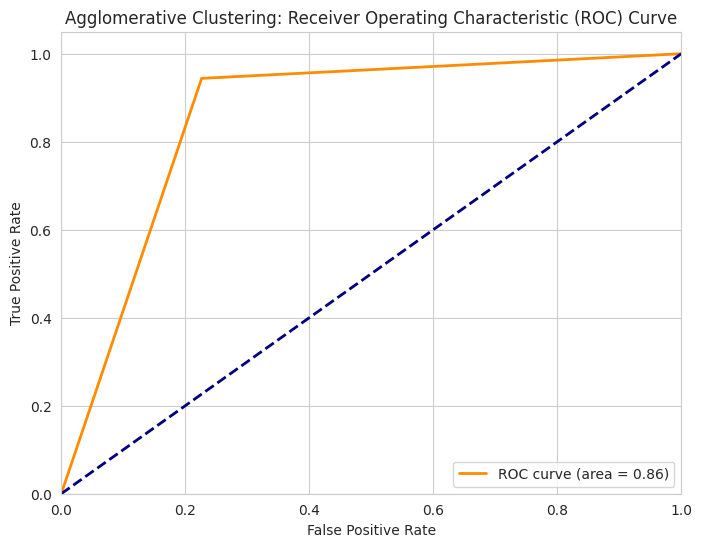

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_agg, tpr_agg, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_agg:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Agglomerative Clustering: Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# --- Agglomerative Clustering Prediction and Decision Making ---
print("\n--- Agglomerative Clustering Prediction and Decision Making ---")
print("Agglomerative Clustering also identified 2 distinct clusters.")
print(f"Cluster 0 (mapped to Malignant) contains {np.sum(labels_agg == 0)} samples.")
print(f"Cluster 1 (mapped to Benign) contains {np.sum(labels_agg == 1)} samples.")


--- Agglomerative Clustering Prediction and Decision Making ---
Agglomerative Clustering also identified 2 distinct clusters.
Cluster 0 (mapped to Malignant) contains 184 samples.
Cluster 1 (mapped to Benign) contains 385 samples.


In [ ]:
print(f"\nSimilar to K-Means, this model achieved an accuracy of {accuracy_agg:.2%} in aligning its clusters with the true diagnoses.")
print("Agglomerative clustering is useful when you want to understand the hierarchical relationships between data points, often visualized with a dendrogram (though not shown here due to complexity).")
print("Decision-makers can observe how similar patients cluster together and potentially identify sub-groups within the malignant or benign categories if more clusters were chosen.")


Similar to K-Means, this model achieved an accuracy of 88.05% in aligning its clusters with the true diagnoses.
Agglomerative clustering is useful when you want to understand the hierarchical relationships between data points, often visualized with a dendrogram (though not shown here due to complexity).
Decision-makers can observe how similar patients cluster together and potentially identify sub-groups within the malignant or benign categories if more clusters were chosen.


In [ ]:
# Agglomerative clustering doesn't have a direct 'predict' method for new, unseen data
# without re-fitting or using a classification model trained on its cluster assignments.
# For new data, one would typically use a classifier trained on the clusters, or identify the cluster
# for a new point by finding its closest existing cluster centroid (similar to K-Means).
print("\nNote: AgglomerativeClustering doesn't have a direct `predict` method for new data.")
print("To classify new data, one would typically train a supervised classifier using the cluster labels, or associate new data points with the closest existing cluster centroid.")


Note: AgglomerativeClustering doesn't have a direct `predict` method for new data.
To classify new data, one would typically train a supervised classifier using the cluster labels, or associate new data points with the closest existing cluster centroid.
